<a href="https://colab.research.google.com/github/DionP23/Data-Mining/blob/main/dion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Load Dataset
data = pd.read_csv('/content/diabetes.csv', sep=';')
data.head()
data.info()
print("\nMissing Values:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pregnancies                2000 non-null   int64  
 1   Glucose                    2000 non-null   int64  
 2   BloodPressure              2000 non-null   int64  
 3   SkinThickness              2000 non-null   int64  
 4   Insulin                    2000 non-null   int64  
 5   BMI                        2000 non-null   float64
 6   Diabetes PedigreeFunction  2000 non-null   float64
 7   Age                        2000 non-null   int64  
 8   Outcome                    2000 non-null   int64  
 9   Unnamed: 9                 0 non-null      float64
 10  Unnamed: 10                1 non-null      object 
dtypes: float64(3), int64(7), object(1)
memory usage: 172.0+ KB

Missing Values:
 Pregnancies                     0
Glucose                         0
BloodPressure  

In [ ]:
if data['Unnamed: 9'].isnull().sum() / len(data) > 0.5: # Check if more than 50% values are missing
    data.drop('Unnamed: 9', axis=1, inplace=True)
if data['Unnamed: 10'].isnull().sum() / len(data) > 0.5:
    data.drop('Unnamed: 10', axis=1, inplace=True)
else:
    # Otherwise, impute missing values (e.g., with mean):
    data['Unnamed: 9'].fillna(data['Unnamed: 9'].mean(), inplace=True)
    data['Unnamed: 10'].fillna(data['Unnamed: 10'].mean(), inplace=True)

In [ ]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
Diabetes PedigreeFunction    0
Age                          0
Outcome                      0
dtype: int64


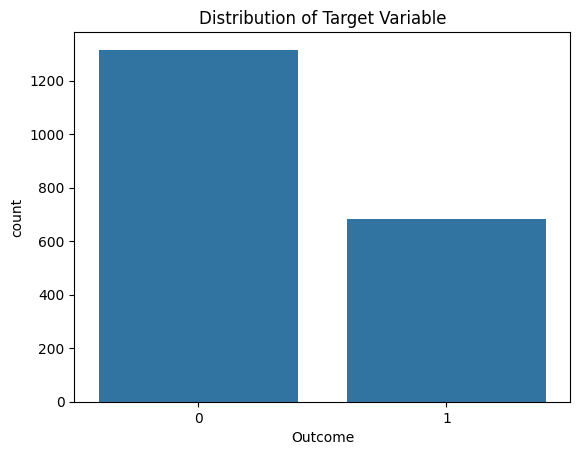

In [ ]:
sns.countplot(x=data.columns[-1], data=data)
plt.title("Distribution of Target Variable")
plt.show()

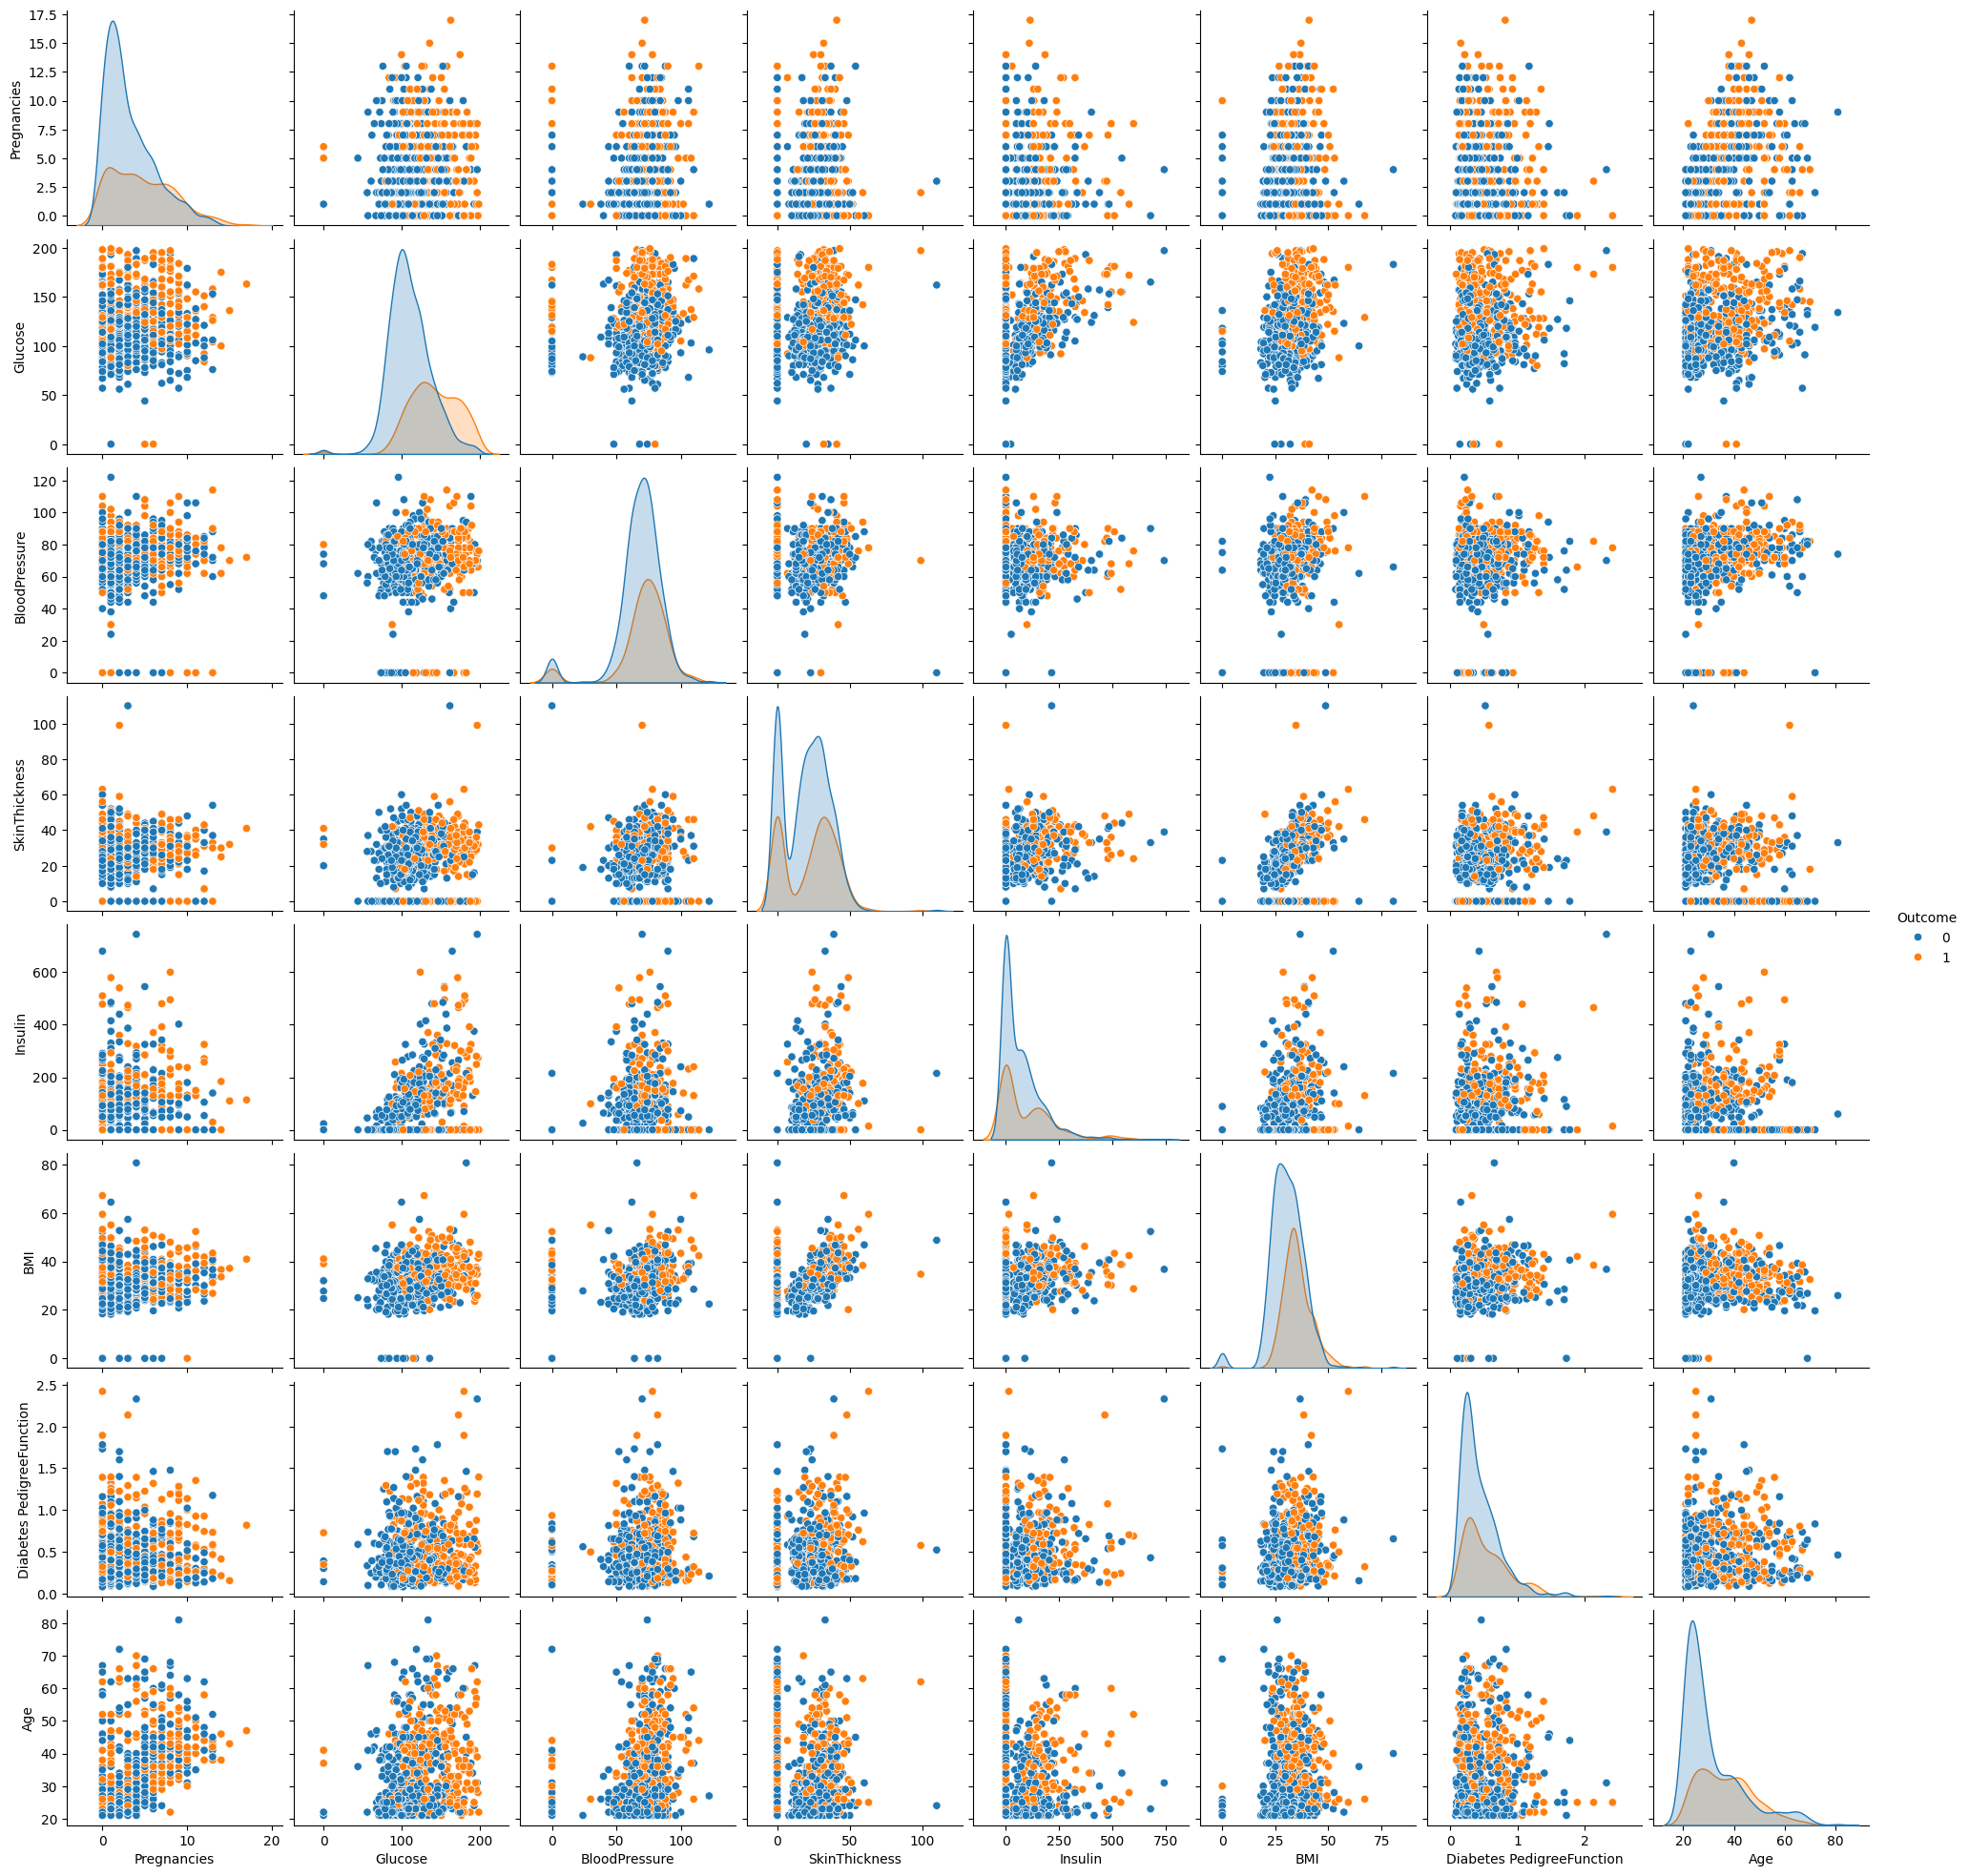

In [ ]:
sns.pairplot(data, hue=data.columns[-1])
plt.show()

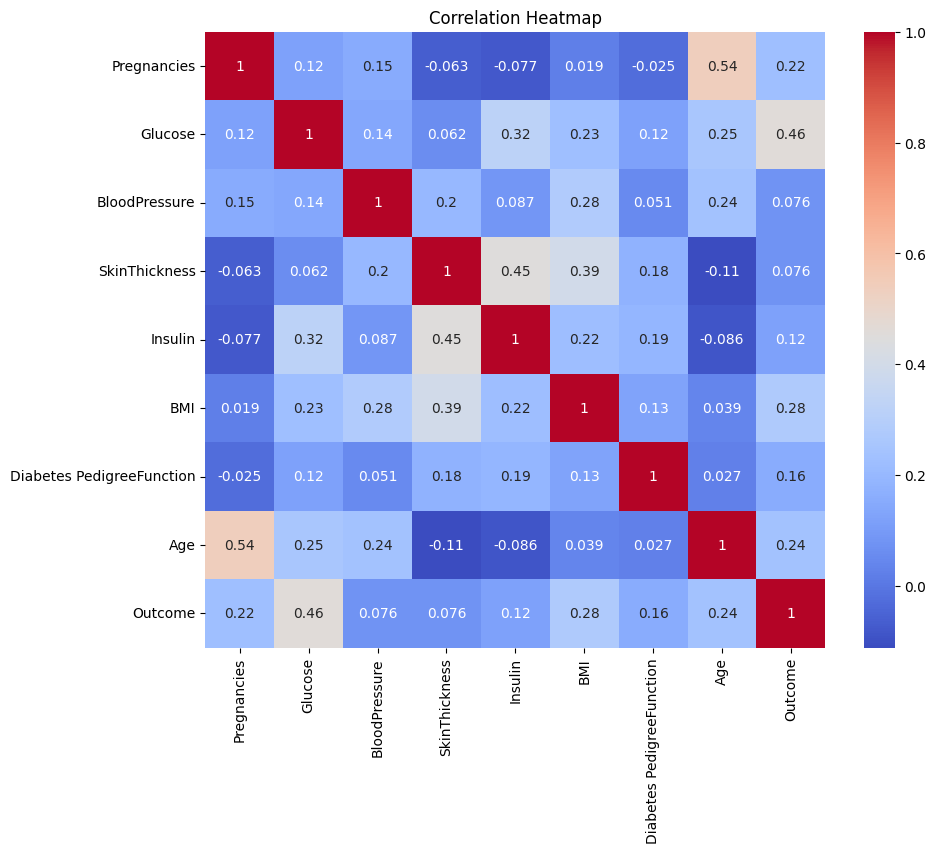

In [ ]:
plt.figure(figsize=(10, 8))
numeric_columns = data.select_dtypes(include=[np.number])
if not numeric_columns.empty:
    sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numerical columns found for correlation heatmap.")

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)
selected_features = selector.get_support(indices=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [ ]:
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))
print("\nSVM Accuracy Score:", accuracy_score(y_test, svm_pred))


SVM Confusion Matrix:
 [[228  25]
 [ 63  84]]

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       253
           1       0.77      0.57      0.66       147

    accuracy                           0.78       400
   macro avg       0.78      0.74      0.75       400
weighted avg       0.78      0.78      0.77       400


SVM Accuracy Score: 0.78


In [ ]:
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\nRandom Forest Accuracy Score:", accuracy_score(y_test, rf_pred))


Random Forest Confusion Matrix:
 [[251   2]
 [  2 145]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Random Forest Accuracy Score: 0.99


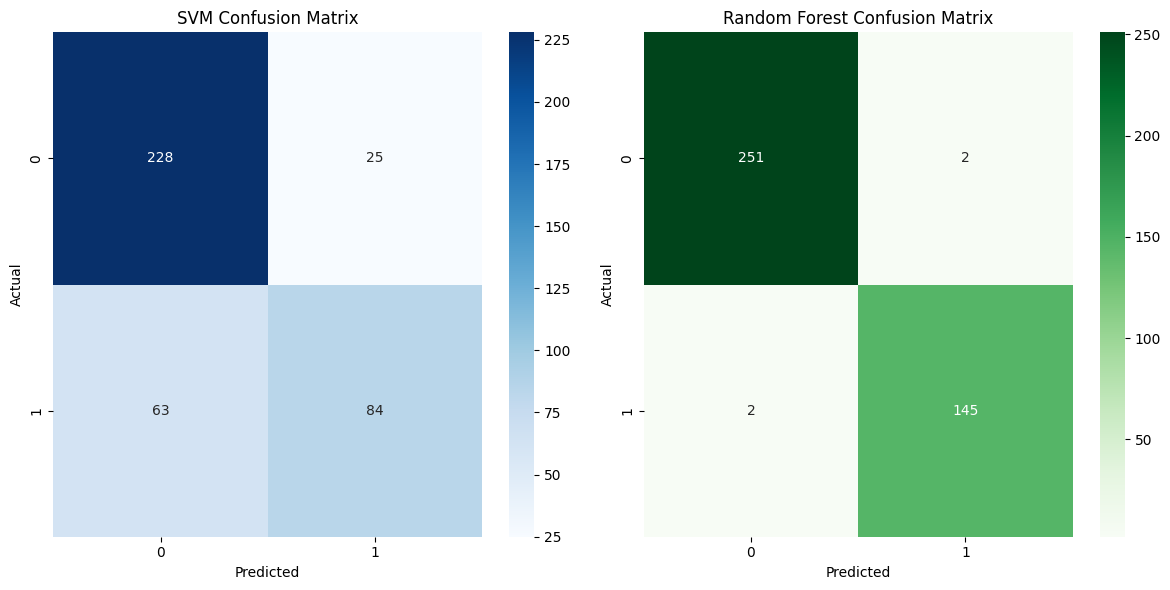

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

In [ ]:
print("\nPerforming K-Fold Cross Validation for SVM...")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svm_kfold_scores = cross_val_score(svm_model, X_selected, y, cv=kf, scoring='accuracy')

print("\nSVM K-Fold Cross Validation Scores:", svm_kfold_scores)
print("SVM Mean Accuracy from K-Fold:", np.mean(svm_kfold_scores))

print("\nPerforming K-Fold Cross Validation for Random Forest...")
rf_kfold_scores = cross_val_score(rf_model, X_selected, y, cv=kf, scoring='accuracy')

print("\nRandom Forest K-Fold Cross Validation Scores:", rf_kfold_scores)
print("Random Forest Mean Accuracy from K-Fold:", np.mean(rf_kfold_scores))



Performing K-Fold Cross Validation for SVM...

SVM K-Fold Cross Validation Scores: [0.79   0.79   0.7825 0.7725 0.7575]
SVM Mean Accuracy from K-Fold: 0.7785

Performing K-Fold Cross Validation for Random Forest...

Random Forest K-Fold Cross Validation Scores: [0.985  0.975  0.975  0.98   0.9825]
Random Forest Mean Accuracy from K-Fold: 0.9795
